# run on old laptop

In [1]:
import sys, numpy as np, pylab as pl, h5py, traceback, glob, os, pdb
from astropy import units as un, constants as cons
from numpy import log10 as log
from importlib import reload
homedir = os.environ['HOME']
if homedir in ('/home/jonathan','/Users/jonathanstern'): homedir+='/Dropbox'
rpc_hydro_dir = homedir+'/other_repositories/rpc_hydro/'
rpc_hydro_pysrc_dir = rpc_hydro_dir + 'pysrc_new'
project_dir = rpc_hydro_dir+'forCHIMES/'
cross_sections_dir = project_dir + 'cross_sections/'
chimes_dir = homedir+'/other_repositories/chimes/'
chimes_tools_dir = chimes_dir + 'chimes-tools/'
chimes_cross_sections_dir = chimes_dir+ 'chimes-tools/generate_cross_sections/'
sys.path += [rpc_hydro_pysrc_dir,project_dir, chimes_cross_sections_dir,chimes_tools_dir]
import forCHIMES
from parameters import *
from matplotlib import ticker
#pl.rcParams['text.usetex']=False #for Quest

In [2]:
main_chimes_data_filename = chimes_dir+'chimes-data/chimes_main_data.hdf5'
absorbed_spectrum_filename = project_dir + 'absorbed_AGN_spectrum.npz'
cross_section_filename_template = cross_sections_dir + 'cross_sections_PL_AGN_NHI%.1f_NH%.1f.hdf5'
fn_abundances = project_dir+'eqm_external_shielding_table_abundances.hdf5'
fn_cooling = project_dir+'eqm_external_shielding_table_cooling_rates.hdf5'
PLUTO_table_filename = project_dir+'output_table.txt'
fn_static_solution = project_dir + 'static_solution.npz'
fn_cloudy_RPC_solution = project_dir + 'cloudy_RPC_solution.npz'
fn_cloudy_dust_cooling_heating = rpc_hydro_dir+'dust_cloudy_cooling_heating.npz'

In [3]:
#add electrons to photoion reactants for Compton heating
# with h5py.File(main_chimes_data_filename, "r+") as h5file:
#     print(h5file["photoion_fuv/N_reactions"][:])
#     del h5file["photoion_fuv/N_reactions"] 
#     h5file["photoion_fuv/N_reactions"] = np.array([9,9],dtype=np.int)
#     print(h5file["photoion_fuv/N_reactions"][:])
    
#     print(h5file["photoion_fuv/reactants"][:])
#     del h5file["photoion_fuv/reactants"]
    
#     h5file["photoion_fuv/reactants"] = np.array([0,3,7,44,57,72,89,90,110],dtype=np.int)
#     print(h5file["photoion_fuv/reactants"][:])

#     print(h5file["photoion_fuv/products"][:,0])
#     del h5file["photoion_fuv/products"]
#     h5file["photoion_fuv/products"] = np.array([[0,0],[1,0],[8,0],[45,0],[58,0],[73,0],
#                                                  [90,0],[91,0],[111,0]],dtype=np.int)
#     print(h5file["photoion_fuv/products"][:,0])
#     h5file.close()   


# generate  spectrum

### generate unattentuated spectrum

In [4]:
reload(forCHIMES)
baseSpectrum = forCHIMES.baseSpectrum()

[ 0.         15.45430327 15.21574264 14.39100999 13.67532811 13.19602445
  9.59762286  7.59562286 -4.0694154 ] 2.2857418336607325e+29


In [5]:
reload(forCHIMES)
spectrum_J_log = forCHIMES.absorbed_spectrum(baseSpectrum,grain_opacities_filename)
np.savez(absorbed_spectrum_filename,
        spectrum_E_log=forCHIMES.logEs,
        spectrum_J_log=spectrum_J_log)

HI cross section at 1 ryd: 5.97e-18
dust cross section at 1 ryd: 1.91e-21 


/home/jonathan/Dropbox/other_repositories/chimes/chimes-tools/generate_cross_sections/generate_cross_sections.py:245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([H, He, C, N, O, Ne, Mg, Si, S, Ca, Fe])


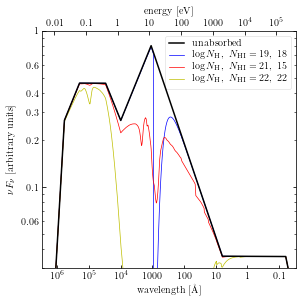

In [6]:
reload(forCHIMES)
iN_tups = ((0,0,'k',1.5,'unabsorbed'),
           (6, 0, 'b',0.7,r'$\log N_{\rm H},\ N_{\rm HI}=19,\ 18$'),
           (0, 4,'r',0.7,r'$\log N_{\rm H},\ N_{\rm HI}=21,\ 15$'),
           (14,6,'y',0.7,r'$\log N_{\rm H},\ N_{\rm HI}=22,\ 22$'))
forCHIMES.spectrum(baseSpectrum, spectrum_J_log,iN_tups, figname=rpc_hydro_dir+'figures/spectrum.pdf')
# forCHIMES.spectrum(baseSpectrum, spectrum_J_log,iN_tups, figname=rpc_hydro_dir+'figures/spectrum_vs_cloudy.pdf',
#                    cloudy_solution=np.load(fn_cloudy_RPC_solution))

/home/jonathan/Dropbox/other_repositories/chimes/chimes-tools/generate_cross_sections/generate_cross_sections.py:245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([H, He, C, N, O, Ne, Mg, Si, S, Ca, Fe])


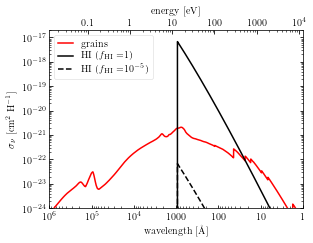

In [35]:
reload(forCHIMES)
forCHIMES.opacity_spectrum(figname=rpc_hydro_dir+'figures/opacity_spectrum.pdf')
# forCHIMES.spectrum(baseSpectrum, spectrum_J_log,iN_tups, figname=rpc_hydro_dir+'figures/spectrum_vs_cloudy.pdf',
#                    cloudy_solution=np.load(fn_cloudy_RPC_solution))

In [36]:
logEs[logEs>-2*dlogE][:3]

array([-1.00000000e-02, -1.91846539e-13,  1.00000000e-02])

In [37]:
spectrum_J_log[-1,0,logEs>-2*dlogE][:3]

array([-15.46285077, -70.        , -70.        ])

In [38]:
reload(forCHIMES)
from forCHIMES import logEs, Rydbergnu
dnus = np.pad((10.**logEs[2:] - 10.**logEs[:-2])*Rydbergnu/2.,1,mode='edge')
print("LAGN: ",((10.**spectrum_J_log[0,0]*dnus)).sum() * 4*np.pi*forCHIMES.rAGN**2 * 4 * np.pi)
print("ion fraction: ",((10.**spectrum_J_log[0,0]*dnus)[logEs>0]).sum()  / (10.**spectrum_J_log[0,0]*dnus).sum() )
print("<hnu>: ",((10.**spectrum_J_log[0,0]*dnus)[logEs>0]).sum()  / ((10.**spectrum_J_log[0,0]*dnus/(10.**logEs*13.6))[logEs>0]).sum() )
print("lng: ", forCHIMES.lng)
print("N spectra: ", spectrum_J_log.shape[:2])

LAGN:  9.949037358199233e+45
ion fraction:  0.30908278974331743
<hnu>:  41.333054562936674
lng:  1.1181835014431152
N spectra:  (19, 11)


In [39]:
reload(forCHIMES)
iNH=10; iNHI=18
f = forCHIMES.ionizing_photons_fraction(10.**spectrum_J_log[0,0], 10.**spectrum_J_log[iNHI,iNH])
print('NH=%.1f NHI=%.1f transmission ionizing photon=%.4f'%(log(NHs[iNH]),log(NHIs[iNHI]),f[-1]))
# pl.plot(logEs[logEs>0],f)

NH=24.0 NHI=24.0 transmission ionizing photon=0.0002


### generate_cross_sections 

In [ ]:
reload( forCHIMES.generate_cross_sections)

In [ ]:
# run one example for debugging
forCHIMES.cross_sections_by_attentuation(absorbed_spectrum_filename,1e15,1e19,0,0)


In [ ]:
# run for all NH, NHI
forCHIMES.cross_sections_by_attentuation_loop(absorbed_spectrum_filename)

### check generate_cross_sections output

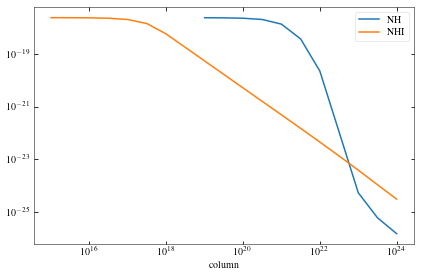

In [11]:
for iPanel in range(2):
    s = ('NH','NHI')[iPanel]
    Ns = (forCHIMES.NHs,forCHIMES.NHIs)[iPanel]
    sigmaHIs = np.zeros(Ns.shape[0])
    for j,N in enumerate(Ns):
        try:
            if iPanel==0: 
                f = h5py.File(cross_section_filename_template%(15.,log(N)),'r')
            if iPanel==1:
                f = h5py.File(cross_section_filename_template%(log(N),15.),'r')
    #         sigmaHIs[j] = f['isotropic_photon_density'][0]
            sigmaHIs[j] = f['photoion_euv']['sigmaPhot'][0] 
#             sigmaHIs[j] = f['photoion_fuv']['epsilonPhot'][0]
        except:
            traceback.print_exc()
            print('failed %s=%.1f'%(s,log(N)))
        f.close()
    pl.loglog(Ns,sigmaHIs,label=s)
#     pl.ylabel('spectrum-averaged excess energy in H$^-$ photoionization')    
    pl.xlabel('column')
    pl.legend()
    # pl.plot(forCHIMES.NHs,forCHIMES.NHs**-1,c='k',ls=':')

# run CHIMES
### run twice, for abundances and for cooling, updating eqm_table_withExternalShielding.param accordingly
### mpirun -np 4 python chimes-driver/chimes-driver.py ../rpc_hydro/forCHIMES/eqm_table_withExternalShielding.param



# check CHIMES output

In [40]:
f_main = h5py.File(main_chimes_data_filename,'r')
photoion_euv_reactants = np.array(f_main["photoion_euv/reactants"])
photoion_fuv_reactants = np.array(f_main["photoion_fuv/reactants"])
f_main.close()
# f_cooling = h5py.File(fn_cooling)
# heating = f_cooling['log_heating_rate']
# cooling = f_cooling['log_cooling_rate']
f_abundances = h5py.File(fn_abundances)
abundances = f_abundances['Abundances'][:,:,:,:,0,:]
lnHs = f_abundances['TableBins']['Densities'][:]
lUs = lng-lnHs    
lTs = f_abundances['TableBins']['Temperatures'][:]
lNHs  = f_abundances['TableBins']['AVs'][:]
lNHIs = f_abundances['TableBins']['NHIs'][:]

(8e+18, 1e+24)

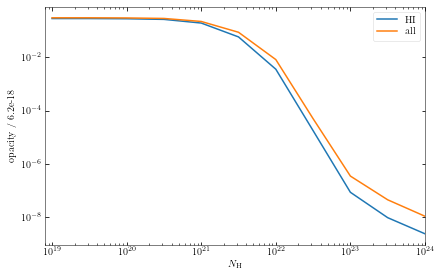

In [41]:
NHs = 10.**lNHs
sigmaHIs = np.zeros(NHs.shape)
sigmas = np.zeros(NHs.shape)
iT = 10 #10^4
inH = -1 #low U
for j,NH in enumerate(NHs):
    try:
        f = h5py.File(cross_section_filename_template%(15.0,log(NH)),'r')        
        opacities = f['photoion_euv']['sigmaPhot'][:]
        specific_abundances = abundances[0,j,iT,inH][photoion_euv_reactants]        
        sigmaHIs[j] = (specific_abundances*opacities)[0]
        sigmas[j] = (specific_abundances*opacities).sum()
    except:
        print('failed NH=%.1f'%log(NH))
        raise
    f.close()
pl.loglog(10.**lNHs,sigmaHIs/6.23e-18,label='HI')
pl.loglog(10.**lNHs,sigmas/6.23e-18,label='all')
pl.legend()
pl.xlabel(r'$N_{\rm H}$')
pl.ylabel(r'opacity / 6.2e-18')
# pl.plot(forCHIMES.NHs,forCHIMES.NHs**-1,c='k',ls=':')
# pl.ylim(1e-6,2)
pl.xlim(0.8e19,1e24)

Text(0, 0.5, 'opacity')

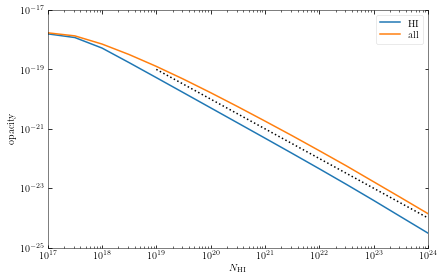

In [42]:
NHIs = forCHIMES.NHIs
sigmaHIs = np.zeros(NHIs.shape)
sigmas = np.zeros(NHIs.shape)
iT = 10 #10^4
inH = -1
for j,NHI in enumerate(NHIs):
    try:
        f = h5py.File(cross_section_filename_template%(log(NHI),15.),'r')                
        opacities = f['photoion_euv']['sigmaPhot'][:]
        specific_abundances = abundances[j,0,iT,inH][photoion_euv_reactants]        
        sigmaHIs[j] = (specific_abundances*opacities)[0]
        sigmas[j] = (specific_abundances*opacities).sum()
    except:
        print('failed NHI=%.1f'%log(NHI))
        raise
    f.close()
pl.loglog(NHIs,sigmaHIs,label='HI')
pl.loglog(NHIs,sigmas,label='all')
pl.legend()
pl.plot(forCHIMES.NHs,forCHIMES.NHs**-1,c='k',ls=':')
pl.ylim(1e-25,1e-17)
pl.xlim(1e17,1e24)
pl.xlabel(r'$N_{\rm HI}$')
pl.ylabel(r'opacity')

# add grain physics to cooling

In [43]:
f_abundances = h5py.File(fn_abundances,'r')
f_cooling = h5py.File(fn_cooling,'r')
f_dust = np.load(fn_cloudy_dust_cooling_heating)
lnHs = f_cooling['TableBins']['Densities'][:]
lUs = lng-lnHs    
lTs = f_cooling['TableBins']['Temperatures'][:]
lNHs  = f_cooling['TableBins']['AVs'][:]
lNHIs = f_cooling['TableBins']['NHIs'][:]
cooling = f_cooling['log_cooling_rate'][:,:,:,:,0]
heating = f_cooling['log_heating_rate'][:,:,:,:,0]

In [44]:
f_cooling['log_cooling_rate'].shape

(19, 11, 36, 19, 1)

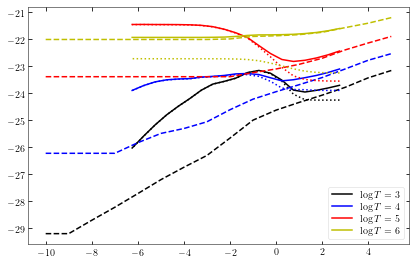

In [45]:
reload(forCHIMES)
for iT,lT in enumerate((3,4,5,6)):
    c='kbry'[iT]
    pl.plot(lUs,cooling[0,0,iT*10,:]-2*lnHs,ls=':',c=c)    
    pl.plot(f_dust['lUs'],f_dust['log_coolings'][iT*10,:],ls='--',c=c)    
    cooling_with_dust = forCHIMES.add_Cloudy_terms(cooling,f_dust['log_coolings'],f_dust['lUs'],lnHs,lUs,lTs,lNHs,lNHIs)
    pl.plot(lUs,cooling_with_dust[0,0,iT*10,:]-2*lnHs,ls='-',c=c,label=r'$\log T=%d$'%lT)    
pl.legend()

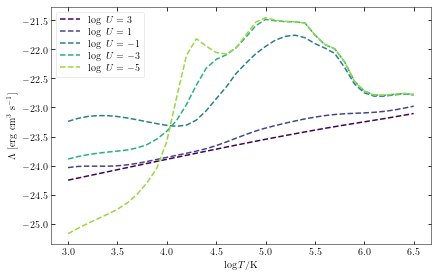

In [46]:
reload(forCHIMES)
for iU,lU in enumerate(lUs[::4]):
    c=pl.get_cmap('viridis')(iU/len(lUs)*4)
#     pl.plot(lTs,cooling_nometals[0,0,:,iU*4]-2*lnHs[iU*4],ls=':',c=c,label=(r'no metals','')[iU!=0])
#     pl.plot(lTs,cooling_regular[0,0,:,iU*4]-2*lnHs[iU*4],ls='-',c=c,label=r'$\log\ U=%.0f$'%lU)    
    pl.plot(lTs,cooling[0,0,:,iU*4]-2*lnHs[iU*4],ls='--',c=c,label=r'$\log\ U=%.0f$'%lU) 
#     pl.plot(f_dust['lUs'],f_dust['log_coolings'][iT*10,:],ls='--',c=c)    
#     forCHIMES.add_Cloudy_terms(cooling,f_dust['log_coolings'],f_dust['lUs'],lnHs,lUs,lTs,lNHs,lNHIs)
#     pl.plot(lUs,cooling[0,0,iT*10,:]-2*lnHs,ls='-',c=c,label=r'$\log T=%d$'%lT)    
pl.legend()
pl.xlabel(r'$\log T/{\rm K}$')
pl.ylabel(r'$\Lambda\ [{\rm erg}\ {\rm cm}^3\ {\rm s}^{-1}]$')
pl.savefig('weird_highT_cooling.pdf')

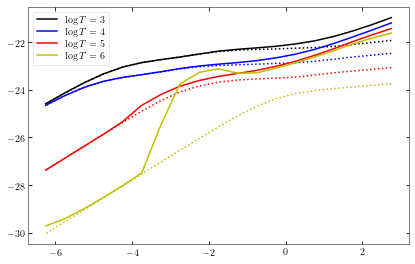

In [47]:
reload(forCHIMES)
for iT,lT in enumerate((3,4,5,6)):
    c='kbry'[iT]
    pl.plot(lUs,heating[0,0,iT*10,:]-2*lnHs,ls=':',c=c)    
#     pl.plot(f_dust['lUs'],f_dust['log_heatings'][iT*10,:],ls='--',c=c)    
    heating_with_dust = forCHIMES.add_Cloudy_terms(heating,f_dust['log_heatings'],f_dust['lUs'],lnHs,lUs,lTs,lNHs,lNHIs)
    pl.plot(lUs,heating_with_dust[0,0,iT*10,:]-2*lnHs,ls='-',c=c,label=r'$\log T=%d$'%lT)    
pl.legend()

# verify table for PLUTO

In [24]:
reload(forCHIMES)
forCHIMES.create_CHIMES_based_Table(cross_section_filename_template,
                                    absorbed_spectrum_filename,
                                    grain_opacities_filename,
                                    fn_abundances,
                                    fn_cooling,
                                    main_chimes_data_filename,
                                    PLUTO_table_filename)

log U: 2.8. time since start: 0
log U: 2.3. time since start: 5
log U: 1.8. time since start: 11
log U: 1.3. time since start: 16
log U: 0.8. time since start: 21
log U: 0.3. time since start: 26
log U: -0.2. time since start: 32
log U: -0.7. time since start: 37
log U: -1.2. time since start: 43
log U: -1.7. time since start: 48
log U: -2.2. time since start: 54
log U: -2.7. time since start: 60
log U: -3.2. time since start: 66
log U: -3.7. time since start: 71
log U: -4.2. time since start: 77
log U: -4.7. time since start: 82
log U: -5.2. time since start: 87
log U: -5.7. time since start: 93
log U: -6.2. time since start: 98


In [48]:
reload(forCHIMES)
# forCHIMES.split_table(PLUTO_table_filename,homedir+'/belt/CHIMES_')
forCHIMES.split_table(PLUTO_table_filename,rpc_hydro_dir+'forCHIMES/CHIMES_')

In [49]:
reload(forCHIMES)
dustOptOpacityTable, dustIonOpacityTable, gasIonOpacityTable, fHITable, heatingTable, coolingTable, netCoolingTable = [
    forCHIMES.PLUTO_Table(('U0','T','NH','NHI'),PLUTO_table_filename,firstLine=1,calculatedValueColumn=i)
    for i in (0,1,2,3,4,5,6)]

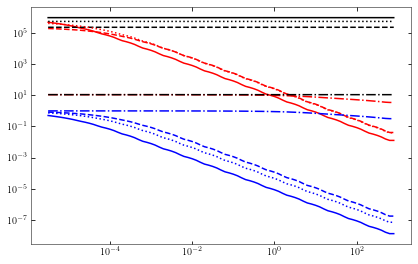

In [50]:
reload(forCHIMES)
forCHIMES.check_HI_opacity(gasIonOpacityTable,fHITable)

# verify ionization equilibrium

In [28]:
inH=10; nH = 10.**lnHs[inH]
iT = 10; T = 10.**lTs[iT]
print('Density',nH,'Temperature',T)
recombination_rate = 2.6e-13 * nH
CI_rate = 5.466e-9*1.07*np.e**(-13.6*un.eV/(cons.k_B*1e4*un.K)) * nH
CR_rate = 1.8e-16
print('recomb rate=%.3g CI rate=%.3g, CR ion rate=%.3g'%(recombination_rate,CI_rate, CR_rate))
for iNHI in range(0,19):
    for iNH in range(0,19)[:1]:
        ng_factor = forCHIMES.ionizing_photons_fraction(10.**spectrum_J_log[0,0], 10.**spectrum_J_log[iNHI,iNH])[-1]
        f = h5py.File(cross_section_filename_template%(log(NHIs[iNHI]),log(NHs[iNH])),'r')
        sigmaHI = f['photoion_euv']['sigmaPhot'][0] 
        f.close() 
        PI_rate = (sigmaHI * un.cm**2 * ng_factor*10.**lng * un.cm**-3 * cons.c).to('s**-1').value
        ne2nH, fHI, fHII = abundances[iNHI,iNH,iT,inH,:3]
        ionization_rate = PI_rate+CI_rate*ne2nH+CR_rate
        print('NHI=%.1f\tng_factor=%.2f\tsigmaHI=%.2f\tion=%.3g\tfHI=%.4f\tproduct=%.3g'%(
            log(NHIs[iNHI]),log(ng_factor), log(sigmaHI),
            ionization_rate, fHI,
            ionization_rate*fHI/(recombination_rate*fHII*ne2nH)))

Density 2320.0640429189702 Temperature 10000.0
recomb rate=6.03e-10 CI rate=1.9e-12, CR ion rate=1.8e-16
NHI=15.0	ng_factor=0.00	sigmaHI=-17.63	ion=9.15e-07	fHI=0.0013	product=1.64
NHI=15.5	ng_factor=-0.00	sigmaHI=-17.64	ion=9.07e-07	fHI=0.0013	product=1.64
NHI=16.0	ng_factor=-0.01	sigmaHI=-17.64	ion=8.84e-07	fHI=0.0013	product=1.64
NHI=16.5	ng_factor=-0.03	sigmaHI=-17.66	ion=8.14e-07	fHI=0.0014	product=1.64
NHI=17.0	ng_factor=-0.09	sigmaHI=-17.70	ion=6.34e-07	fHI=0.0018	product=1.65
NHI=17.5	ng_factor=-0.24	sigmaHI=-17.86	ion=3.11e-07	fHI=0.0038	product=1.65
NHI=18.0	ng_factor=-0.50	sigmaHI=-18.25	ion=6.95e-08	fHI=0.0162	product=1.63
NHI=18.5	ng_factor=-0.78	sigmaHI=-18.76	ion=1.14e-08	fHI=0.0836	product=1.57
NHI=19.0	ng_factor=-1.05	sigmaHI=-19.27	ion=1.88e-09	fHI=0.3030	product=1.56
NHI=19.5	ng_factor=-1.31	sigmaHI=-19.78	ion=3.18e-10	fHI=0.6152	product=1.56
NHI=20.0	ng_factor=-1.57	sigmaHI=-20.29	ion=5.47e-11	fHI=0.8292	product=1.53
NHI=20.5	ng_factor=-1.82	sigmaHI=-20.80	ion=9.64e

### check CIE output

In [ ]:
f_CIE_abundances = h5py.File(project_dir+'CIE_eqm_table_abundances.hdf5')
CIE_abundances = f_CIE_abundances['Abundances'][0,0,:,:,0,:]
inH=10; nH = 10.**f_CIE_abundances['TableBins']['Densities'][inH]
iT = 4; T = 10.**f_CIE_abundances['TableBins']['Temperatures'][iT]
print('Density',nH,'Temperature',T)
recombination_rate = 2.6e-13 * nH
CI_rate = 5.466e-9*1.07*np.e**(-13.6*un.eV/(cons.k_B*1e4*un.K)) * nH
CR_rate = 1.8e-16
print('recomb rate=%.3g CI rate=%.3g, CR ion rate=%.3g'%(recombination_rate,CI_rate, CR_rate))
ne2nH, fHI, fHII = CIE_abundances[iT,inH,:3]
ionization_rate = CI_rate*ne2nH+CR_rate
print('ion=%.3g\tfHI=%.4f\tproduct=%.3g'%(
    ionization_rate, fHI,
    ionization_rate*fHI/(recombination_rate*fHII*ne2nH)))

### factor of ~2 in optically thin limit may be due to grain-assisted recombination. see fig. 14.6 in Draine

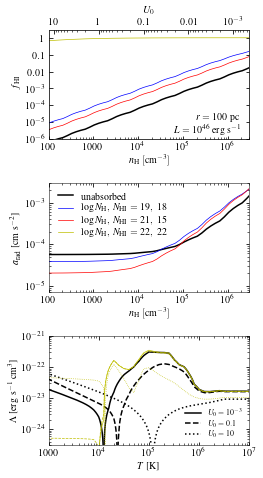

In [31]:
reload(forCHIMES)
forCHIMES.opacity_and_cooling_plot(iN_tups,spectrum_J_log,netCoolingTable,
                                   (dustOptOpacityTable, dustIonOpacityTable, gasIonOpacityTable,fHITable),
                                  figname=rpc_hydro_dir+'figures/acc_and_cooling.pdf')

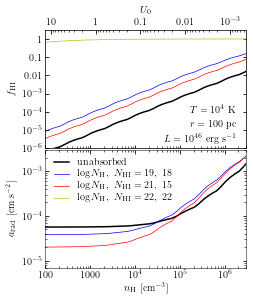

In [51]:
reload(forCHIMES)
forCHIMES.opacity_plot(iN_tups,spectrum_J_log,
                                   (dustOptOpacityTable, dustIonOpacityTable, gasIonOpacityTable,fHITable),
                                  figname=rpc_hydro_dir+'figures/acc.pdf')

In [70]:
iN_tups = ((0,0,'k',1.5,'unabsorbed',10.**np.array([-5,-3,-1,1][::-1])),
#           (6, 0, 'b',0.7,r'$\log N_{\rm H},\ N_{\rm HI}=19,\ 18$'),
#           (0, 4,'r',0.7,r'$\log N_{\rm H},\ N_{\rm HI}=21,\ 15$'),
#           (14,6,'y',0.7,r'$\log N_{\rm H},\ N_{\rm HI}=22,\ 22$',[1e-5])
          )

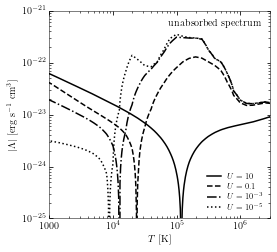

In [72]:
reload(forCHIMES)
forCHIMES.cooling_plot(iN_tups,spectrum_J_log,netCoolingTable,
                                  figname=rpc_hydro_dir+'figures/cooling_new.pdf')

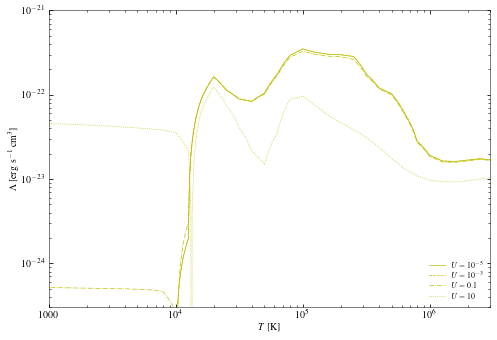

In [18]:
reload(forCHIMES)
forCHIMES.cooling_plot(iN_tups[3:4],spectrum_J_log,netCoolingTable,
                                  figname=rpc_hydro_dir+'figures/cooling_new.pdf')

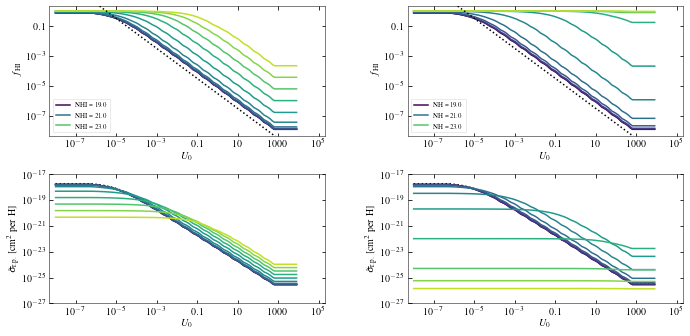

In [38]:
reload(forCHIMES)
forCHIMES.weightedOpacity_plot((dustOptOpacityTable, dustIonOpacityTable, gasIonOpacityTable,fHITable))

all cooling U0=-8.0 NH=23 NHI=0
all cooling U0=-7.0 NH=23 NHI=0
all cooling U0=-6.0 NH=23 NHI=0
all cooling U0=-5.0 NH=23 NHI=0
all cooling U0=-4.0 NH=23 NHI=0
all cooling U0=-3.0 NH=23 NHI=0
all cooling U0=-2.0 NH=23 NHI=0
all heating U0=3.0 NH=23 NHI=0
all heating U0=4.0 NH=23 NHI=0
all cooling U0=-8.0 NH=24 NHI=0
all cooling U0=-7.0 NH=24 NHI=0
all cooling U0=-6.0 NH=24 NHI=0
all cooling U0=-5.0 NH=24 NHI=0
all cooling U0=-4.0 NH=24 NHI=0
all cooling U0=-3.0 NH=24 NHI=0
all cooling U0=-2.0 NH=24 NHI=0
all cooling U0=-1.0 NH=24 NHI=0
all cooling U0=-0.0 NH=24 NHI=0
all heating U0=1.0 NH=0 NHI=21
all heating U0=1.0 NH=0 NHI=22
all heating U0=2.0 NH=0 NHI=22
all cooling U0=-8.0 NH=0 NHI=23
all cooling U0=-7.0 NH=0 NHI=23
all cooling U0=-6.0 NH=0 NHI=23
all cooling U0=-5.0 NH=0 NHI=23
all cooling U0=-4.0 NH=0 NHI=23
all cooling U0=-3.0 NH=0 NHI=23
all heating U0=2.0 NH=0 NHI=23
all cooling U0=-8.0 NH=0 NHI=24
all cooling U0=-7.0 NH=0 NHI=24
all cooling U0=-6.0 NH=0 NHI=24
all cooling U0

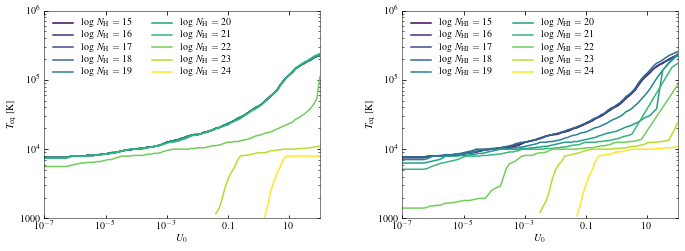

In [39]:
reload(forCHIMES)
forCHIMES.Teq_plot(netCoolingTable)

# equilibrium solution

In [ ]:
reload(forCHIMES)
dustOptOpacityTable, dustIonOpacityTable, gasIonOpacityTable, fHITable, heatingTable, coolingTable, netCoolingTable = [
    forCHIMES.PLUTO_Table(('U0','T','NH','NHI'),PLUTO_table_filename,firstLine=1,calculatedValueColumn=i)
    for i in (0,1,2,3,4,5,6)]

In [42]:
f_abundances = h5py.File(fn_abundances)
abundances = f_abundances['Abundances'][:,:,:,:,0,:]

In [43]:
reload(forCHIMES)
tables_dic = {}
for s in ('elec','OIII','NII','SII','OI','NeIII','NeV','OII'):
    tables_dic[s] = forCHIMES.PLUTO_Table(('NHIs','AVs','Temperatures','Densities'),
                      chimes_output = f_abundances,
                      calculatedValueColumn = forCHIMES.speciesIndex(s))
elec_table,OIII_table, NII_table, SII_table, OI_table,NeIII_table, NeV_table, OII_table = [
    tables_dic[s] for s in ('elec','OIII','NII','SII','OI','NeIII','NeV','OII')]

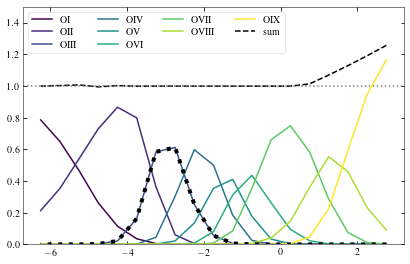

In [45]:
cmap = pl.get_cmap('viridis')
ab = DC16_abundances['O']
for i in range(23,32):
    pl.plot(forCHIMES.lng-f_abundances['TableBins']['Densities'][:],abundances[0,0,10,:,i] / ab,label=forCHIMES.species[i],c=cmap((i-23)/8))
pl.plot(forCHIMES.lng-f_abundances['TableBins']['Densities'][:],abundances[0,0,10,:,23:32].sum(axis=1) / ab,c='k',ls='--',label='sum')
pl.plot(forCHIMES.lng-OIII_table.propertyValues[3],OIII_table(1,1,1e4,10.**OIII_table.propertyValues[3])/ ab,c='k',ls=':',lw=4)
pl.legend(ncol=4)
pl.ylim(0,1.5)
pl.axhline(1.,c='.5',ls=':')

In [46]:
cloudy_fracs = [np.genfromtxt('../CloudyRuns/constantDensity/constantDensity_a-1.4_L4%d.7/oxygen.coutput'%i) for i in (1,6)]

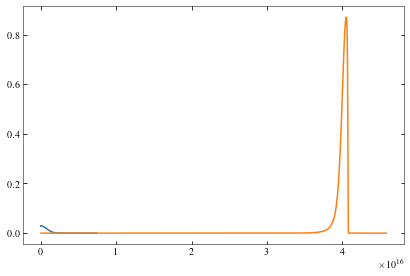

In [47]:
pl.plot(cloudy_fracs[0][:,0],cloudy_fracs[0][:,3])
pl.plot(cloudy_fracs[1][:,0],cloudy_fracs[1][:,3])

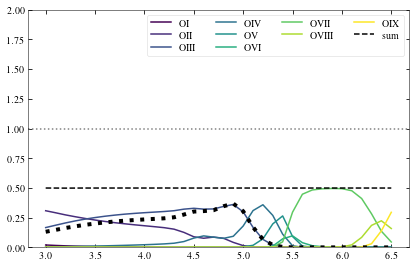

In [48]:
cmap = pl.get_cmap('viridis')
ab = DC16_abundances['O']*2
for i in range(23,32):
    pl.plot(lTs,abundances[0,0,:,-7,i] / ab,label=forCHIMES.species[i],c=cmap((i-23)/8))
pl.plot(lTs,abundances[0,0,:,-7,23:32].sum(axis=1) / ab,c='k',ls='--',label='sum')
pl.plot(OIII_table.propertyValues[2],OIII_table(1,1,10.**OIII_table.propertyValues[2],10**4.5)/ ab,c='k',ls=':',lw=4)
pl.legend(ncol=4)
pl.ylim(0,2)
pl.axhline(1.,c='.5',ls=':')

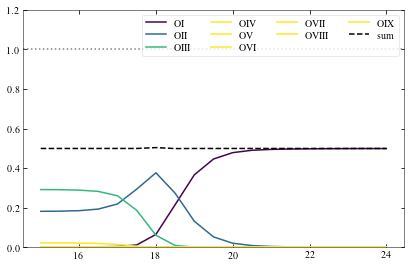

In [49]:
cmap = pl.get_cmap('viridis')
ab = DC16_abundances['O']*2
for i in range(23,32):
    pl.plot(lNHIs,abundances[:,0,10,-7,i] / ab,label=forCHIMES.species[i],c=cmap((i-23)/
                                                                                3))
pl.plot(lNHIs,abundances[:,0,10,-7,23:32].sum(axis=1) / ab,c='k',ls='--',label='sum')
# pl.plot(OIII_table.propertyValues[0],OIII_table(10.**OIII_table.propertyValues[0],1,1e4,10**4.5)/ ab,c='k',ls=':',lw=4)
pl.legend(ncol=4)
pl.ylim(0,1.2)
pl.axhline(1.,c='.5',ls=':')

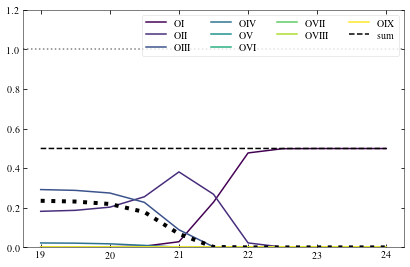

In [50]:
cmap = pl.get_cmap('viridis')
ab = DC16_abundances['O']*2
for i in range(23,32):
    pl.plot(lNHs,abundances[0,:,10,-7,i] / ab,label=forCHIMES.species[i],c=cmap((i-23)/8))
pl.plot(lNHs,abundances[0,:,10,-7,23:32].sum(axis=1) / ab,c='k',ls='--',label='sum')
pl.plot(OIII_table.propertyValues[1],OIII_table(1,10.**OIII_table.propertyValues[1],1e4,10**4.5)/ ab,c='k',ls=':',lw=4)
pl.legend(ncol=4)
pl.ylim(0,1.2)
pl.axhline(1.,c='.5',ls=':')

(5000.0, 20000.0)

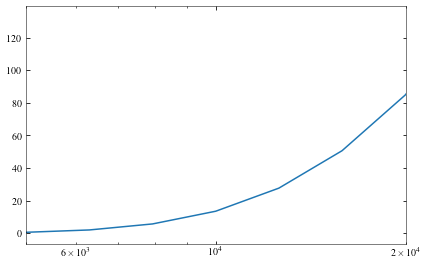

In [51]:
import emission
pl.semilogx(10.**lTs[5:15],emission.OIII2Hb(10**(lTs[5:15]-4),5e-4))
pl.xlim(5e3,2e4)

#### why does total O abundance exceed unity at high U?

In [19]:
reload(forCHIMES)
U_f = 100
U0s, Ts, NHIs, NHs, rs, taus,sigmas,fHIs = forCHIMES.equilibrium_solution(U_f,
                                            (dustOptOpacityTable, dustIonOpacityTable, gasIonOpacityTable), 
                                                        netCoolingTable, fHITable,return_extras=True)

zone #0/30000,zone #1000/30000,zone #2000/30000,zone #3000/30000,zone #4000/30000,zone #5000/30000,zone #6000/30000,zone #7000/30000,zone #8000/30000,zone #9000/30000,zone #10000/30000,zone #11000/30000,zone #12000/30000,zone #13000/30000,zone #14000/30000,zone #15000/30000,zone #16000/30000,zone #17000/30000,zone #18000/30000,zone #19000/30000,zone #20000/30000,zone #21000/30000,zone #22000/30000,zone #23000/30000,zone #24000/30000,zone #25000/30000,zone #26000/30000,zone #27000/30000,zone #28000/30000,zone #29000/30000,

In [20]:
nHs = 10.**forCHIMES.lng/U0s
np.savez(fn_static_solution,nHs=nHs,taus=taus,Ts=Ts,U0s=U0s,NHs=NHs,NHIs=NHIs,rs=rs,sigmas=sigmas,fHIs=fHIs)

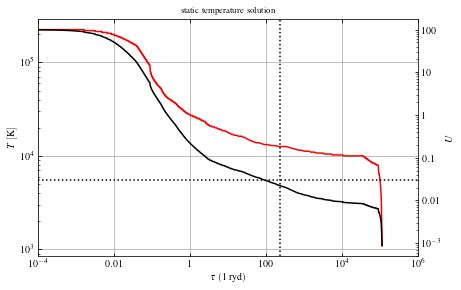

In [55]:
static_solution = np.load(fn_static_solution)
taus_1ryd = (static_solution['NHs']*forCHIMES.sigma_dust_one_rydberg + 
             static_solution['NHIs']*forCHIMES.sigma_HI_one_rydberg)
pl.loglog(taus_1ryd,static_solution['Ts'],c='r')
pl.title('static temperature solution')
pl.xlabel(r'$\tau\ (1\ {\rm ryd})$')
pl.ylabel(r'$T\ [{\rm K}]$')
pl.xlim(1e-4,1e6)
pl.gca().xaxis.set_major_formatter(forCHIMES.arilogformatter)
pl.grid()
pl.axvline(np.interp(1,taus,taus_1ryd),c='k',ls=':')

ax2 = pl.twinx()
pl.plot(taus_1ryd,static_solution['U0s'],c='k')
ax2.set_yscale('log')
pl.axhline(0.03,ls=':',c='k')
pl.ylabel(r'$U$')
ax2.yaxis.set_major_formatter(forCHIMES.arilogformatter)

In [ ]:
cloudy_static = np.load(fn_cloudy_RPC_solution)
inds_cloudy = cloudy_static['fHIs']<0.5
for line in lines:    
    print(line[0], cloudy_static['L'+line[0]+line[1]][inds_cloudy][-1])


In [ ]:
for line in lines:
    print(line[0],static_total_line_emission(static,line))

In [ ]:
pl.subplots_adjust(hspace=0.5,wspace=0.5)
pl.subplot(221)
pl.semilogy(rs/3e18/100,NHIs,c='k',label=r'NHI')
pl.semilogy(rs/3e18/100,NHs,label=r'NH')
# pl.xlim(0.55,0.65)
pl.ylim(1e15,1e24)
pl.legend()
pl.ylabel('column')
pl.twinx()
pl.plot(rs[:-1]/3e18/100,(NHIs[1:]-NHIs[:-1])/(NHs[1:]-NHs[:-1]),ls=':',c='r')
pl.xlabel('r [100 pc]')
pl.ylabel(r'$f_{\rm HI}$')

pl.subplot(222)
pl.loglog(NHs,U0s)
pl.ylim(0.001,200)
pl.xlabel(r'$N_{\rm H}$')
pl.ylabel(r'$U_0$')
pl.grid()
pl.xlim(1e18,1e23)

pl.subplot(223)
pl.loglog(NHs,Ts)
pl.grid()
pl.xlabel(r'$N_{\rm H}$')
pl.ylabel(r'$T$')
pl.ylim(1e3,1e6)
pl.xlim(1e18,1e23)

In [ ]:
reload(forCHIMES)
U_fs = 10.**np.arange(-4,3)
U0s, Ts, NHIs, NHs, rs, taus = {},{},{},{},{},{}
for U_f in U_fs:
    U0s[U_f], Ts[U_f], NHIs[U_f], NHs[U_f], rs[U_f], taus[U_f] = forCHIMES.equilibrium_solution(U_f,
                                            (dustOptOpacityTable, dustIonOpacityTable, gasIonOpacityTable), 
                                                        netCoolingTable, fHITable)
    np.savez(fn_static_solution[:-4]+'%d.npz'%log(U_f),
             U0s=U0s[U_f], Ts=Ts[U_f], NHIs=NHIs[U_f], NHs=NHs[U_f], rs=rs[U_f],
             nHs=10.**forCHIMES.lng/U0s[U_f],taus=taus[U_f])

In [ ]:
74.66*0.486

In [ ]:
reload(forCHIMES)
forCHIMES.plot_equilibrium_solutions(U_fs,fn_static_solution,elec_table)

In [ ]:
f_abundances.close()

In [ ]:
import emission

In [ ]:
OIII2Hb_finals = np.zeros(len(U_fs))
NII2Ha_finals = np.zeros(len(U_fs))
SII2Ha_finals = np.zeros(len(U_fs))
OI2Ha_finals = np.zeros(len(U_fs))
for iU,U_f in enumerate(U_fs):
    nHs = 10.**forCHIMES.lng/U0s[U_f]
    fHIs = np.concatenate([NHIs[U_f][:1]/NHs[U_f][:1], (NHIs[U_f][1:]-NHIs[U_f][:-1]) / (NHs[U_f][1:]-NHs[U_f][:-1])])
    nHIIs = nHs * (1-fHIs)
    nOIII2nHII = OIII_table(NHIs[U_f],NHs[U_f],Ts[U_f],nHs) / (1-fHIs)
    nNII2nHII  = NII_table (NHIs[U_f],NHs[U_f],Ts[U_f],nHs) / (1-fHIs)
    nSIIs      = SII_table (NHIs[U_f],NHs[U_f],Ts[U_f],nHs) * nHs
    nOIs       = OI_table  (NHIs[U_f],NHs[U_f],Ts[U_f],nHs) * nHs
    nes        = elec_table(NHIs[U_f],NHs[U_f],Ts[U_f],nHs) * nHs
    OIII2Hbs = emission.OIII2Hb(Ts[U_f]/1e4, nOIII2nHII )
    NII2Has  = emission.NII2Ha( Ts[U_f]/1e4, nNII2nHII )
    LHas     = emission.Lrecomb(emission.alpha_Ha(Ts[U_f]/1e4),nHIIs,nes,emission.E_Ha)
    LHbs     = emission.Lrecomb(emission.alpha_Hb(Ts[U_f]/1e4),nHIIs,nes,emission.E_Hb)
    LOIIIs   = LHbs * OIII2Hbs
    LNIIs    = LHas * NII2Has
    LSIIs    = emission.LSII_6716(Ts[U_f]/1e4,nSIIs,nes) + emission.LSII_6731(Ts[U_f]/1e4,nSIIs,nes)
    LOIs     = emission.LOI(Ts[U_f]/1e4,nOIs,nes)
    LOIIIs_e = LOIIIs * emission.extinction(NHs[U_f], emission.E_OIII)
    LNIIs_e  = LNIIs  * emission.extinction(NHs[U_f], emission.E_NII)
    LSIIs_e  = LSIIs  * emission.extinction(NHs[U_f], emission.E_SII6716)
    LOIs_e   = LOIs   * emission.extinction(NHs[U_f], emission.E_OI)
    LHbs_e   = LHbs   * emission.extinction(NHs[U_f], emission.E_Hb)
    LHas_e   = LHas   * emission.extinction(NHs[U_f], emission.E_Ha)
    OIII2Hb_finals[iU] = LOIIIs_e[~np.isnan(LOIIIs_e)].sum() / LHbs_e[~np.isnan(LHbs_e)].sum()
    NII2Ha_finals[iU]  = LNIIs_e[~np.isnan(LNIIs_e)].sum()   / LHas_e[~np.isnan(LHas_e)].sum()
    SII2Ha_finals[iU]  = LSIIs_e[~np.isnan(LSIIs_e)].sum()   / LHas_e[~np.isnan(LHas_e)].sum()
    OI2Ha_finals[iU]   = LOIs_e[~np.isnan(LOIs_e)].sum()     / LHas_e[~np.isnan(LHas_e)].sum()

In [ ]:
pl.semilogx(U_fs,log(OIII2Hb_finals),c='b',label='[OIII]/Hb')
pl.semilogx(U_fs,log(NII2Ha_finals), c='r',label='[NII]/Ha')
pl.semilogx(U_fs,log(SII2Ha_finals), c='c',label='[SII]/Ha')
pl.semilogx(U_fs,log(OI2Ha_finals), c='k',label='[OI]/Ha')
pl.ylim(-2,1.5)
pl.xlabel(r'$U_i$')
pl.ylabel(r'line ratio')
pl.legend()

In [ ]:
import BPT
axlist = BPT.figBPT_overKewley()
for iax,ax in enumerate(axlist):
    pl.sca(ax)
    xs = (NII2Ha_finals,SII2Ha_finals,OI2Ha_finals)[iax]
    pl.plot(log(xs),log(OIII2Hb_finals),c='k',lw=0.7)
    pl.scatter(log(xs),log(OIII2Hb_finals),marker='s',facecolors='w',edgecolors='k',
               s=10.*np.arange(1,len(U_fs)+1),zorder=100)


In [ ]:
pl.figure(figsize=(7,7))
for iPanel in range(4):
    pl.subplot(2,2,iPanel+1)
    pl.semilogx(NHs[U_f], (fOIIIs,OIII2Hbs,LHbs_e,LOIIIs_e.cumsum()/LHbs_e.cumsum())[iPanel])    
#     if iPanel==2: pl.semilogx(NHs,LHbs,c='r')
    pl.xlim(1e19,1e23)

In [ ]:
pl.figure(figsize=(7,7))
for iPanel in range(3):
    pl.subplot(3,1,iPanel+1)
    pl.semilogx(NHs[U_f], (NII2Has,LHas_e,LNIIs_e.cumsum()/LHas_e.cumsum())[iPanel])    
#     if iPanel==2: pl.semilogx(NHs,LHbs,c='r')
    pl.xlim(1e19,1e23)

In [ ]:
pl.figure(figsize=(7,7))
for iPanel in range(4):
    pl.subplot(2,2,iPanel+1)
    pl.loglog(NHs, (U0s,Ts,fHIs,Pgas_to_Prad)[iPanel])    
    pl.xlim(1e19,1e23)
    if iPanel==2: 
        pl.ylim(1e-7,3)
    if iPanel>=2: 
        pl.axhline(1,c='k',ls=':')

In [ ]:
reload(forCHIMES)
lNH = 15.
for ilNHI,lNHI in enumerate(np.arange(15,24,0.5)):
    filename = cross_section_filename_template%(lNHI,lNH)
    f = h5py.File(filename,'r')
    opacities = f['photoion_euv']['sigmaPhot'][:]                            
    f.close()
    ratios = []
    c = pl.get_cmap('viridis')(ilNHI/9)
    for inH in range(11):    
        index = ilNHI,iNH,iT,inH = 5,0,2,inH
        ratios.append( (abundances[index][1] * opacities[0] / (abundances[index][5] * opacities[82]) ))
    pl.semilogy(forCHIMES.lng-f_abundances['TableBins']['Densities'], ratios,c=c,label='NHI=%d'%lNHI)
pl.ylim(1/1000,1000)
pl.legend()
pl.xlabel(r'$U$')
pl.ylabel('HI opacity / HeII opacity')
#     pl.gca().set_xticks(range(goods.nonzero()[0].shape[0]))
#     _=pl.gca().set_xticklabels(np.array(forCHIMES.species)[photoion_euv_reactants[goods]])